In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('perrin-freres-monthly-champagne-.csv')

In [4]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.columns = ['Month','Sales']

In [6]:
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [7]:
df.shape

(107, 2)

In [8]:
#to check missing value
df.isnull().sum()

Month    1
Sales    2
dtype: int64

In [9]:
df.tail()

,Month,Sales
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


In [10]:
#Remove lat two column
df.drop(106, axis=0,inplace=True)
df.drop(105, axis=0,inplace=True)

In [11]:
#df.shape
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


In [12]:
df.dtypes

Month     object
Sales    float64
dtype: object

In [13]:
#converting month column to date-time format
df['Month'] = pd.to_datetime(df['Month'])
df.dtypes

Month    datetime64[ns]
Sales           float64
dtype: object

In [14]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [15]:
#setting month as index
df.set_index('Month', inplace=True)

In [17]:
df.head()

,Sales
Month,
1964-01-01,2815.0
1964-02-01,2672.0
1964-03-01,2755.0
1964-04-01,2721.0
1964-05-01,2946.0


In [19]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

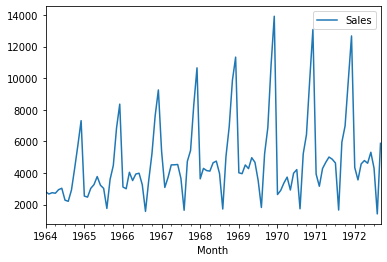

In [20]:
#seasonal data
df.plot()

In [21]:
#adfuller test
from statsmodels.tsa.stattools import adfuller

In [23]:
adfuller(df['Sales'])

(-1.8335930563276197,
 0.3639157716602465,
 11,
 93,
 {'1%': -3.502704609582561,
  '5%': -2.8931578098779522,
  '10%': -2.583636712914788},
 1478.4633060594724)

In [26]:
#check if data is stationary
def adfuller_test(sales):
    result = adfuller(sales)
    
    labels = ['ADF test Statistic', 'p-value', 'Lags used', 'Number of obs used']
    
    for value,label in zip(result,labels):
        print('{} : {} '.format(label, value))
    if result[1] < 0.05:
        print('Data is stationary')
    else:
        print('Data is not stationary')

In [27]:
adfuller_test(df['Sales'])

ADF test Statistic : -1.8335930563276197 
p-value : 0.3639157716602465 
Lags used : 11 
Number of obs used : 93 
Data is not stationary


In [28]:
df['Sales'].shift(1)

Month
1964-01-01       NaN
1964-02-01    2815.0
1964-03-01    2672.0
1964-04-01    2755.0
1964-05-01    2721.0
               ...  
1972-05-01    4788.0
1972-06-01    4618.0
1972-07-01    5312.0
1972-08-01    4298.0
1972-09-01    1413.0
Name: Sales, Length: 105, dtype: float64

In [29]:
df['Sales first diff'] = df['Sales'] - df['Sales'].shift(1)

In [30]:
df.head()

,Sales,Sales first diff
Month,,
1964-01-01,2815.0,NaN
1964-02-01,2672.0,-143.0
1964-03-01,2755.0,83.0
1964-04-01,2721.0,-34.0
1964-05-01,2946.0,225.0


In [31]:
#shift of 12 bcz of 12 months
df['Seasonal first diff'] = df['Sales'] - df['Sales'].shift(12)

In [32]:
df.head()

,Sales,Sales first diff,Seasonal first diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [34]:
 adfuller_test(df['Seasonal first diff'].dropna())

ADF test Statistic : -7.626619157213166 
p-value : 2.0605796968136632e-11 
Lags used : 0 
Number of obs used : 92 
Data is stationary


<AxesSubplot:xlabel='Month'>

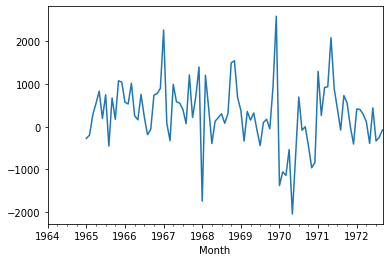

In [35]:
df['Seasonal first diff'].plot()

In [36]:
# ARIMA algorithm: AR + I + MA = (p,d,q)
# p -pacf graph
# d =1
# q = acf graph

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [37]:
df.head(15)

,Sales,Sales first diff,Seasonal first diff
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


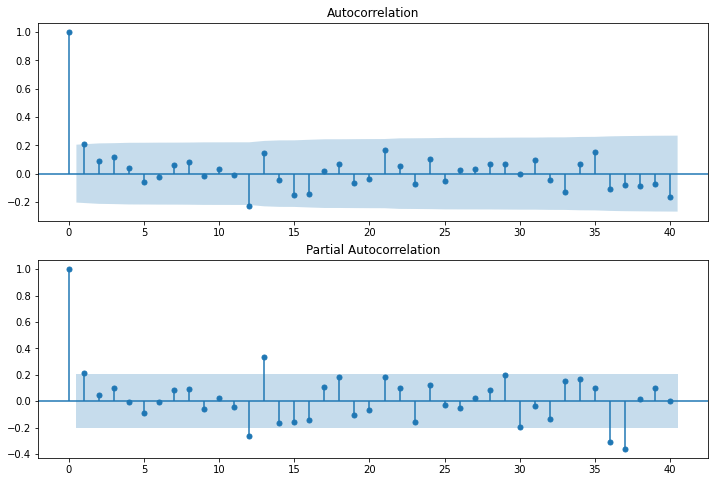

In [39]:
#choose index = 13 according to above cell
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(df['Seasonal first diff'].iloc[13:], lags=40, ax = ax1)

ax2 = fig.add_subplot(212)
fig = plot_pacf(df['Seasonal first diff'].iloc[13:], lags=40, ax = ax2)

In [40]:
from statsmodels.tsa.arima_model import ARIMA

In [41]:
model = ARIMA(df['Sales'], order=(1,1,1))

c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWar

In [42]:
model = model.fit()

c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [43]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  104
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -951.126
Method:                       css-mle   S.D. of innovations           2227.262
Date:                Tue, 30 Mar 2021   AIC                           1910.251
Time:                        18:05:45   BIC                           1920.829
Sample:                    02-01-1964   HQIC                          1914.536
                         - 09-01-1972                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            22.7859     12.405      1.837      0.066      -1.528      47.100
ar.L1.D.Sales     0.4343      0.089      4.866      0.000       0.259       0.609
ma.L1.D.Sales    -1.0000      0.026    -38.503      0.000      -1.051      -0.949
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3023           +0.0000j            2.3023            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [44]:
df.shape

(105, 3)

In [45]:
df['forecast']=model.predict(start=90,end=103, dynamic=True)

In [47]:
df.tail()

,Sales,Sales first diff,Seasonal first diff,forecast
Month,,,,
1972-05-01,4618.0,-170.0,-392.0,22.893490
1972-06-01,5312.0,694.0,438.0,22.832616
1972-07-01,4298.0,-1014.0,-335.0,22.806175
1972-08-01,1413.0,-2885.0,-246.0,22.794691
1972-09-01,5877.0,4464.0,-74.0,NaN


<AxesSubplot:xlabel='Month'>

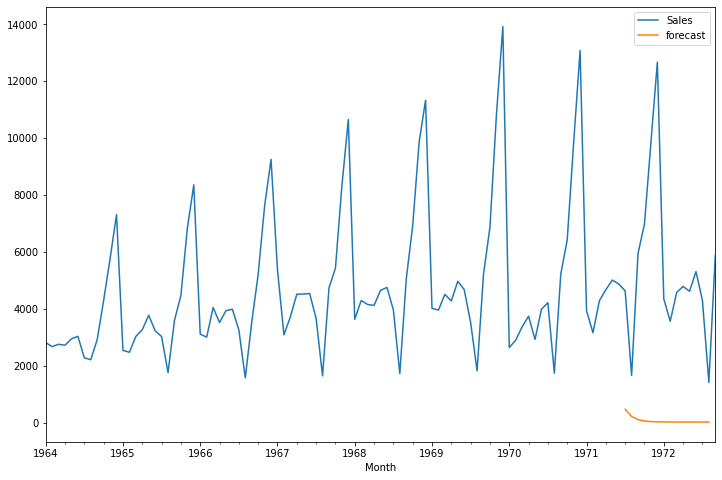

In [49]:
df[['Sales', 'forecast']].plot(figsize=(12,8))

In [52]:
#ARIMA is not used for seasonal data
#using SARIMAX-seasonal ARIMA for better prediction
import statsmodels.api as sm

In [54]:
#(p,d,q,shift_value)(12 as index bcz of 12 months)
model = sm.tsa.statespace.SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))

c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\prince_shaks\appdata\local\programs\python\python36\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [55]:
results = model.fit()

In [56]:
df['forecast_SARIMAX'] = results.predict(start=90, end=103,dynamic = True)

In [58]:
df.tail()

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
Month,,,,,
1972-05-01,4618.0,-170.0,-392.0,22.893490,4717.511048
1972-06-01,5312.0,694.0,438.0,22.832616,4906.404083
1972-07-01,4298.0,-1014.0,-335.0,22.806175,4685.436609
1972-08-01,1413.0,-2885.0,-246.0,22.794691,2232.408573
1972-09-01,5877.0,4464.0,-74.0,NaN,NaN


<AxesSubplot:xlabel='Month'>

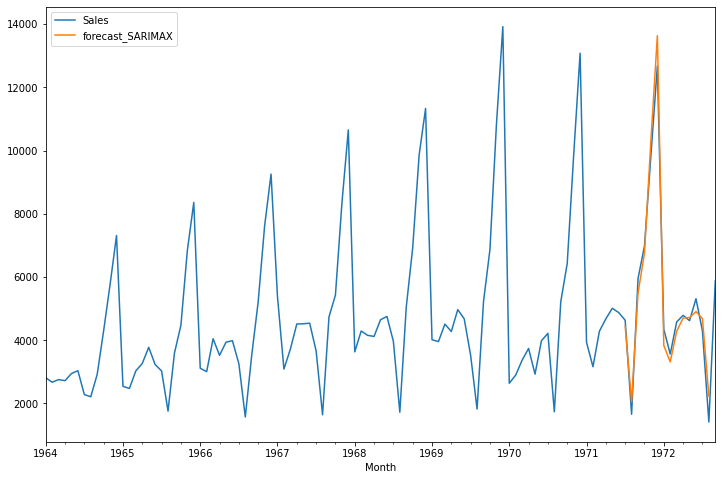

In [59]:
df[['Sales', 'forecast_SARIMAX']].plot(figsize=(12,8))

In [60]:
from pandas.tseries.offsets import DateOffset

In [63]:
df.index[-1]

Timestamp('1972-09-01 00:00:00')

In [65]:
future_dates = [df.index[-1] + DateOffset(months=x) for x in range(0,24)]

In [66]:
future_dates[1:]

[Timestamp('1972-10-01 00:00:00'),
 Timestamp('1972-11-01 00:00:00'),
 Timestamp('1972-12-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1973-02-01 00:00:00'),
 Timestamp('1973-03-01 00:00:00'),
 Timestamp('1973-04-01 00:00:00'),
 Timestamp('1973-05-01 00:00:00'),
 Timestamp('1973-06-01 00:00:00'),
 Timestamp('1973-07-01 00:00:00'),
 Timestamp('1973-08-01 00:00:00'),
 Timestamp('1973-09-01 00:00:00'),
 Timestamp('1973-10-01 00:00:00'),
 Timestamp('1973-11-01 00:00:00'),
 Timestamp('1973-12-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1974-02-01 00:00:00'),
 Timestamp('1974-03-01 00:00:00'),
 Timestamp('1974-04-01 00:00:00'),
 Timestamp('1974-05-01 00:00:00'),
 Timestamp('1974-06-01 00:00:00'),
 Timestamp('1974-07-01 00:00:00'),
 Timestamp('1974-08-01 00:00:00')]

In [71]:
future_dataset = pd.DataFrame(index = future_dates[1:], columns=df.columns)

In [72]:
future_dataset.tail()

,Sales,Sales first diff,Seasonal first diff,forecast,forecast_SARIMAX
1974-04-01,NaN,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN,NaN


In [74]:
future_df = pd.concat([df, future_dataset])

In [75]:
future_df.shape

(128, 5)

In [77]:
future_df['forecast_SARIMAX2'] = results.predict(start = 104, end=124, dynamic=True)

<AxesSubplot:>

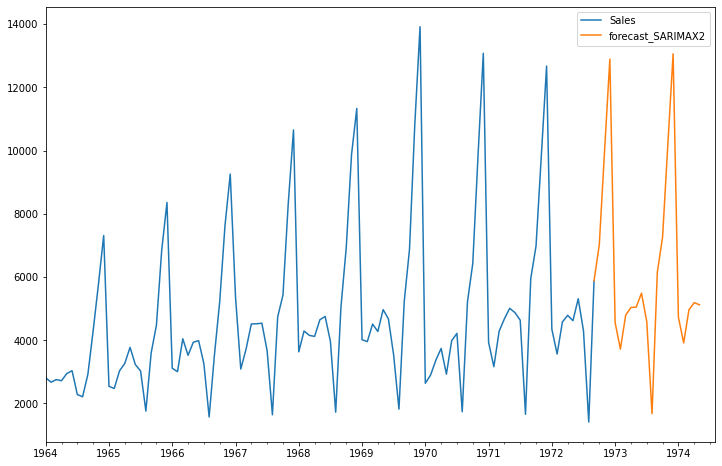

In [79]:
future_df[['Sales','forecast_SARIMAX2']].plot(figsize=(12,8))